# Brain Stroke EDA 

# Planning

### Structure of this project will be organized as follows:

1. **Introduction:** Objective/background info on the project and dataset provided by user


2. **Understanding and Setup**: Import libraries and files, understand the data


3. **Cleaning:** Clean columns, find nulls, duplicates, inconsistent, missing values


4. **EDA and Visualization**- Comparing Brain Stroke and Non Brain Stroke patients
    
    a. Univariate Analysis 
    
    b. Correlation 
    

# Introduction

Objective of this project is to **compare characteristics** between patients who had and did not have a brain stroke, and possibly **identify** whether some characteristics **influence the likelihood of a brain stroke**. However, it is worth noting that because brain strokes are often hereditary, this **does not gurantee** a direct correlation, but rather this project is intended to gain better insight with the given dataset regarding paritnes who had/did not have a brain stroke. 

Data is found via Kaggle by Jillani Soft Tech (https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset)

**Here are some details about the attributes given by the user who scrapped this data:**

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0: patient doesn't have hypertension, 1: patient has hypertension

4) heart_disease: 0  patient doesn't have any heart diseases, 1: patient has a heart disease 

5) ever-married: "No" or "Yes"

6) worktype: "children", "Govt_job", "Neverworked", "Private" or "Self-employed" 

7) Residence_type: "Rural" or "Urban"

8) avg_glucose_level: average glucose level in blood

9) bmi: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1: patient had a stroke, 0: did not



_*Note: "Unknown" in smoking_status means that the information is unavailable for this patient_

# Understanding and Setup

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
df = pd.read_csv('brain_stroke.csv')

### Understanding Dataset

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.shape

(4981, 11)

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [9]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [10]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

# Cleaning Data

In [11]:
#checking for nulls

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**_there are no null values in this dataset. Yay!_**

In [12]:
# checking for duplicates
df[df.duplicated() == True]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


**_there are no duplicate values in this dataset. Yay!_**

In [13]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
df['age'].astype('int64').dtype

dtype('int64')

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# EDA and Data Visualization

For this project, I thought that it would be more insightful if we performed univatiate analysis on **two separate dataframes**: one tailored for patients who had a stroke (stroke == 1), and one for those who did not (stroke == 0). Lets do a side by side comparison for the distribution of each variable.

## Univariate Analysis and Comparison

In [16]:
bs = df[df['stroke'] == 1]
no_bs = df[df['stroke'] == 0]

In [17]:
bs.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Gender

C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

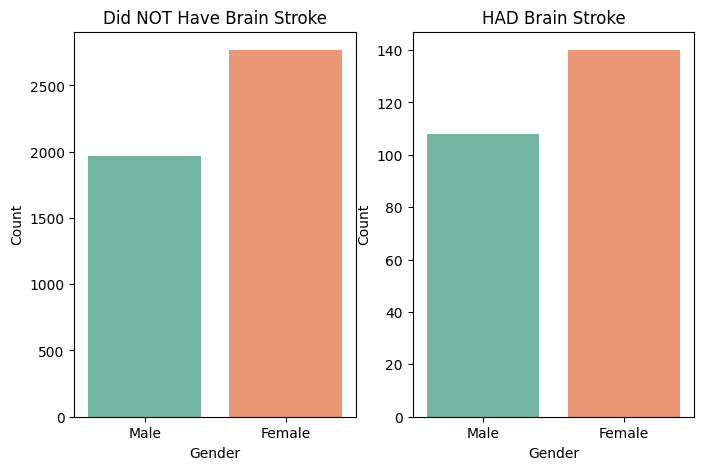

In [18]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(no_bs['gender'], palette = 'Set2')
plt.title('Did NOT Have Brain Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(bs['gender'], palette = 'Set2')
plt.title('HAD Brain Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')

It appears that the distribution betwen patients who had and did not have a brain stroke is almost exactly the same

In [19]:
no_bs_male = (no_bs['gender'].value_counts().loc['Male'] / no_bs.shape[0]) * 100
no_bs_female = (no_bs['gender'].value_counts().loc['Female'] / no_bs.shape[0]) * 100

print('Patients who did NOT Have Brain Stroke: \n% of Male: ' + str(no_bs_male.round(decimals = 2)))
print('% of Female: ' + str(no_bs_female.round(decimals = 2)))

Patients who did NOT Have Brain Stroke: 
% of Male: 41.54
% of Female: 58.46


In [20]:
bs_male = (bs['gender'].value_counts().loc['Male'] / bs.shape[0]) * 100
bs_female = (bs['gender'].value_counts().loc['Female'] / bs.shape[0]) * 100

print('Patients who DID Have Brain Stroke: \n% of Male: ' + str(bs_male.round(decimals=2)))
print('% of Female: ' + str(bs_female.round(decimals=2)))

Patients who DID Have Brain Stroke: 
% of Male: 43.55
% of Female: 56.45


### Age

Text(0, 0.5, 'Count')

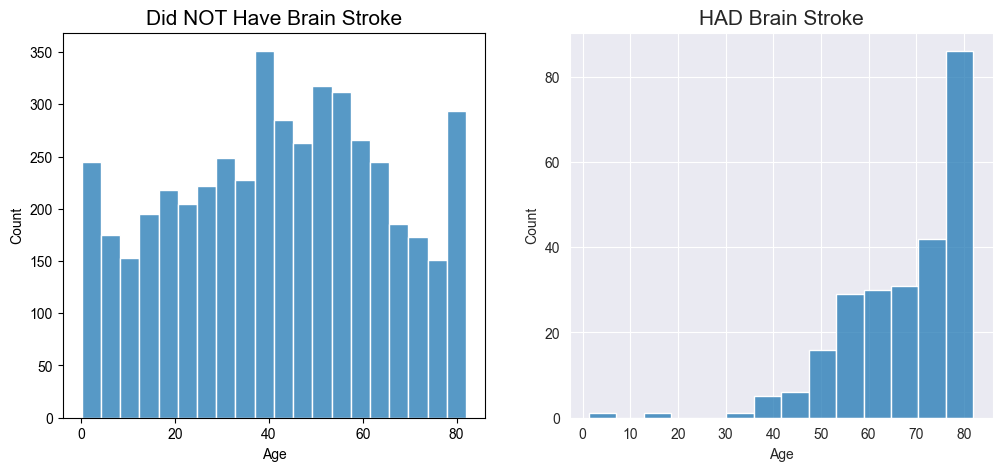

In [21]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.histplot(no_bs.age)
plt.title('Did NOT Have Brain Stroke', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.histplot(bs.age)
plt.title('HAD Brain Stroke', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')


Did **NOT** Have Brain Stroke: 
- pretty symmetrical 
- most are usually 40 year old patients
- Nevertheless, suggests that having brain stroke is typically not common for most age groups

**Had** Brain Stroke: 
- left skewed 
- most are 80+ year old patients 
- Suggests that people are more likely to have a brain stroke as they get older


Lets **categorize** each age group from _Human Age Group Classification_ from Statistics Canada. Note that these age groups may differ within each resource. This particular source categorized human age based on facial features.

- 0-14 Years: Child 
- 15-24: Youth
- 25-64: Adult
- 65 years and over : Senior

C:\Users\leena\AppData\Local\Temp\ipykernel_6340\609646408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_bs['Age Group'] = pd.cut(no_bs.age, bins = [0,14,24,64,85], labels=['Child\n(0-14)', 'Youth\n(15-24)', 'Adult\n(25-64)', 'Senior\n(65+)'])
C:\Users\leena\AppData\Local\Temp\ipykernel_6340\609646408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs['Age Group'] = pd.cut(bs.age, bins = [0,14,24,64,85], labels=['Child\n(0-14)', 'Youth\n(15-24)', 'Adult\n(25-64)', 'Senior\n(65+)'])


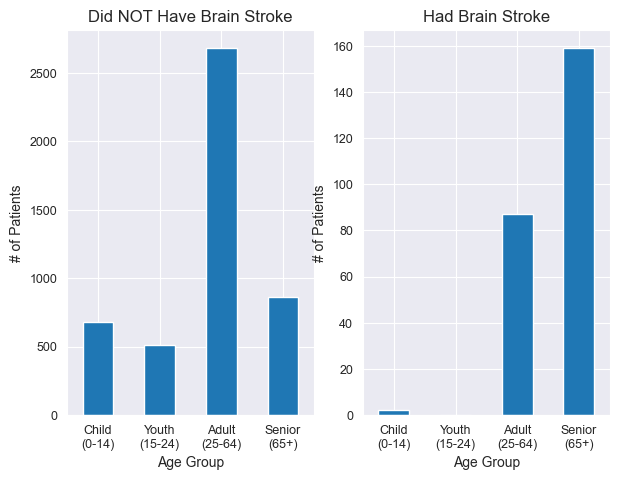

In [105]:
no_bs['Age Group'] = pd.cut(no_bs.age, bins = [0,14,24,64,85], labels=['Child\n(0-14)', 'Youth\n(15-24)', 'Adult\n(25-64)', 'Senior\n(65+)'])
bs['Age Group'] = pd.cut(bs.age, bins = [0,14,24,64,85], labels=['Child\n(0-14)', 'Youth\n(15-24)', 'Adult\n(25-64)', 'Senior\n(65+)'])
plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
no_bs['Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Did NOT Have Brain Stroke')
plt.xlabel('Age Group')
plt.xticks(rotation='horizontal', fontsize = 9)
plt.ylabel('# of Patients')
plt.yticks(fontsize=9)

plt.subplot(1,2,2)
bs['Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Had Brain Stroke')
plt.xlabel('Age Group')
plt.xticks(rotation='horizontal', fontsize = 9)
plt.ylabel('# of Patients')
plt.yticks(fontsize=9)

plt.show()

In [119]:
bs_senior = (bs['Age Group'].value_counts().loc['Senior\n(65+)']/bs.shape[0])*100
bs_senior = round(bs_senior,2)
bs_adult = (bs['Age Group'].value_counts().loc['Adult\n(25-64)']/bs.shape[0])*100
bs_adult = round(bs_adult,2)


no_bs_senior = (no_bs['Age Group'].value_counts().loc['Senior\n(65+)']/no_bs.shape[0])*100
no_bs_senior = round(no_bs_senior,2)
no_bs_adult = (no_bs['Age Group'].value_counts().loc['Adult\n(25-64)']/no_bs.shape[0])*100
no_bs_adult = round(no_bs_adult,2)

print(f'Non Brain Stroke Patients:\nAdults: {str(no_bs_adult)}%\nSeniors: {str(no_bs_senior)}%\nCombined: {str(no_bs_senior+no_bs_adult)}%')
print(f'\n\nBrain Stroke Patients:\nAdults: {str(bs_adult)}%\nSeniors: {str(bs_senior)}%\nCombined: {str(bs_senior+bs_adult)}%')

Non Brain Stroke Patients:
Adults: 56.64%
Seniors: 18.19%
Combined: 74.83%


Brain Stroke Patients:
Adults: 35.08%
Seniors: 64.11%
Combined: 99.19%


**Key Takeaways:** **99%** of brain stroke patients are adults and seniors, where **64%** of them are **seniors** (65 years and older). On the contrary, only **_18%_** of non brain stroke patients are seniors, and **_57%_** make up adults.

### Hypertension

C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

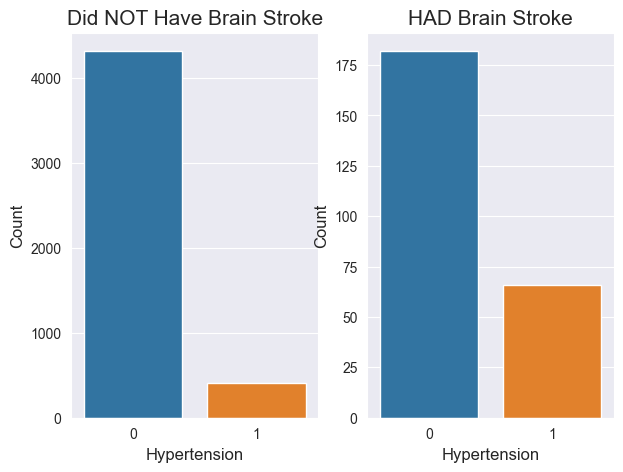

In [22]:
plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
sns.countplot(no_bs.hypertension)
plt.title('Did NOT Have Brain Stroke', fontsize = 15)
plt.xlabel('Hypertension', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(bs.hypertension)
plt.title('HAD Brain Stroke', fontsize= 15)
plt.xlabel('Hypertension', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Both bar charts show that most patients did **not** have hypertension, a larger **proportion** of patients **had hypertension** amongst those who **had a brain stroke**. However, this may be simply due to the smaller number of patients who had a brain stroke in total. 

That being said, let's calculate the % of patients who had hypertension

In [23]:
no_bs_hyp = (no_bs['hypertension'].value_counts().loc[1] / no_bs.shape[0])*100
bs_hyp = (bs['hypertension'].value_counts().loc[1] / bs.shape[0])*100

In [24]:
print('% With Hypertension AND WITHOUT Brain Stroke: ' + str(no_bs_hyp.round(decimals=2)))
print('& With Hypertension AND Brain Stroke: ' + str(bs_hyp.round(decimals=2)))

% With Hypertension AND WITHOUT Brain Stroke: 8.73
& With Hypertension AND Brain Stroke: 26.61


It appears that a significantly larger % of patients who **had a brain stroke also had hypertension** (27% as opposed to 9%)

### Heart Disease

C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'HAD Brain Stroke')

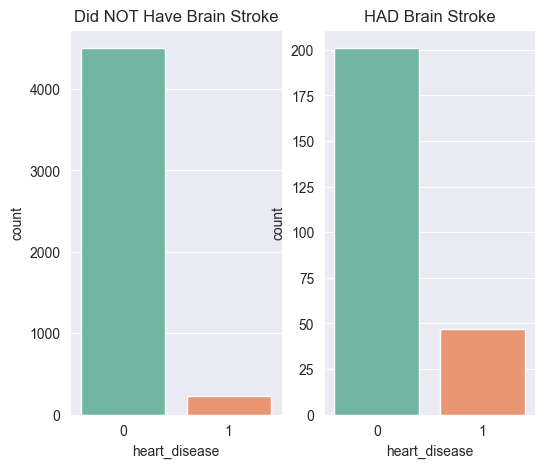

In [25]:
plt.figure(figsize=(6,5))

plt.subplot(1,2,1)
sns.countplot(no_bs.heart_disease, palette = 'Set2')
plt.title('Did NOT Have Brain Stroke')

plt.subplot(1,2,2)
sns.countplot(bs.heart_disease, palette = 'Set2')
plt.title('HAD Brain Stroke')

This distribution for heart disease is very similar to the distribution of hypertensions. Just like the prior, here below are the proportion of patients who had/did not have heart disease. It would be better to measure proportion since there there is a significanly larger pool of patients who did not have a brain stroke. 

In [26]:
no_bs_heart = (no_bs['heart_disease'].value_counts().loc[1]/no_bs.shape[0])*100
bs_heart = (bs['heart_disease'].value_counts().loc[1]/bs.shape[0])*100

print('% of Non Brain Stroke Patients with Heart Disease: ' + str(no_bs_heart.round(decimals=2)))
print('% of Brain Stroke Patients with Heart Disease: ' + str(bs_heart.round(decimals=2)))

% of Non Brain Stroke Patients with Heart Disease: 4.82
% of Brain Stroke Patients with Heart Disease: 18.95


Though this is noticeable proportion difference between patients who had a heart disease, we can **not gurantee** that there is some positive correlation between heart disease and patients who had a brain stroke. This is mainly because of the **sample size differences**: there were about 5000 patients who did not have a brain stroke while only around 250 patients did have a brain stroke. This would be stronger if the sample size for patients who had a brain stroke was larger.

### Married

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

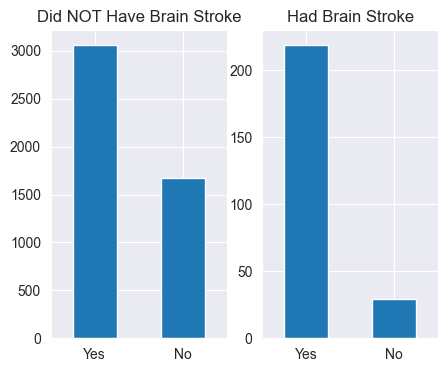

In [27]:
plt.figure(figsize=(5,4))

plt.subplot(1,2,1)
no_bs['ever_married'].value_counts().plot(kind = 'bar')
plt.title('Did NOT Have Brain Stroke')
plt.xticks(rotation = 'horizontal')

plt.subplot(1,2,2)
bs['ever_married'].value_counts().plot(kind='bar')
plt.title('Had Brain Stroke')
plt.xticks(rotation='horizontal')

Majority of patients were married (with or without brain stroke), and though it appears that there is a larger proportion of patients who did not get a brain stroke NOT married, marital status does not seem to be a very relevant factor into whether a patient got a brain stroke or not. 

### Work Type

Text(0.5, 1.0, 'Had Brain Stroke')

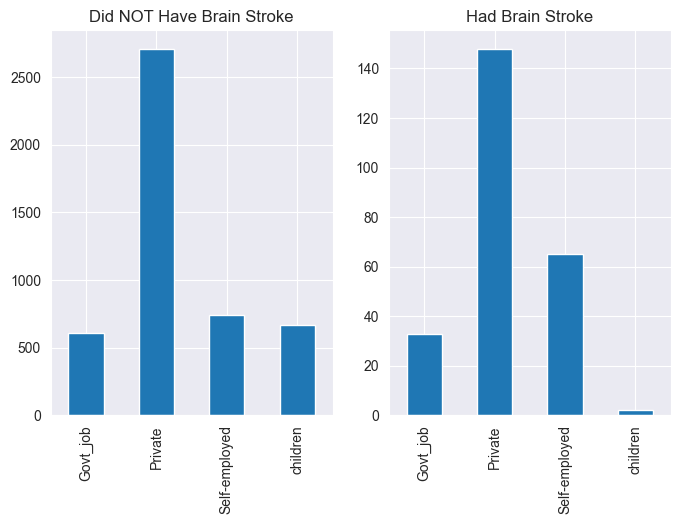

In [28]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
no_bs['work_type'].value_counts().sort_index().plot(kind='bar')
plt.title('Did NOT Have Brain Stroke')

plt.subplot(1,2,2)
bs['work_type'].value_counts().sort_index().plot(kind='bar')
plt.title('Had Brain Stroke')

Distribution between both graphs are very similar: most patients have a "Private" work type. However, there are very little patients who had a brain stroke that a children, which is plausible as we noticed in the Age distribution, majority of patients with stroke were seniors.

### Residence Type

(0.0, 200.0)

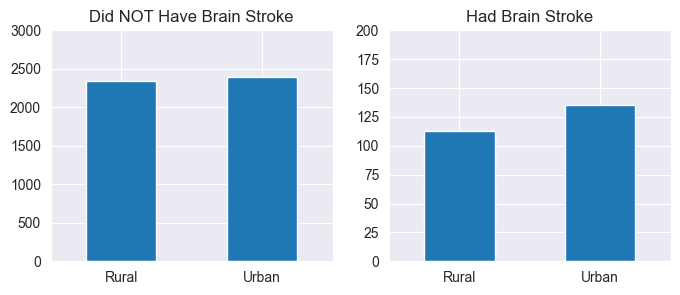

In [29]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
no_bs['Residence_type'].value_counts().sort_index().plot(kind='bar')
plt.title('Did NOT Have Brain Stroke')
plt.xticks(rotation = 'horizontal')
plt.ylim(0, 3000)

plt.subplot(1,2,2)
bs['Residence_type'].value_counts().sort_index().plot(kind='bar')
plt.title('Had Brain Stroke')
plt.xticks(rotation = 'horizontal')
plt.ylim(0, 200)



Distributions of residence type for patients who had and did not have brain stroke are very similar: both graphs show that slightly more patients live in more urban areas, but generally they are divided pretty evenly for both graphs.

### Average Glucose Level

Text(0.5, 1.0, 'Avg Glucose Level Distribution')

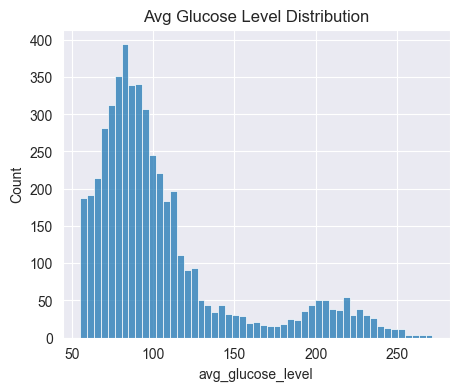

In [30]:
plt.figure(figsize=(5,4))
sns.histplot(df['avg_glucose_level'])
plt.title('Avg Glucose Level Distribution')

The units were not specified in the dataset. However, given the historgram of average glucose levels, it is safe to assume that glucose levels were measured in mg/dL (since normal glucose levels are considered to be around 90 mg/dL). 

Text(0.5, 0, 'Avg Glucose Level (mg/dL)')

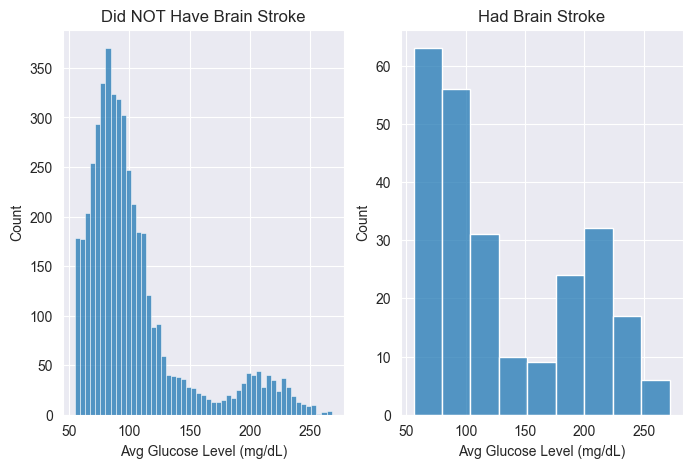

In [31]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.histplot(no_bs['avg_glucose_level'])
plt.title('Did NOT Have Brain Stroke')
plt.xlabel('Avg Glucose Level (mg/dL)')

plt.subplot(1,2,2)
sns.histplot(bs['avg_glucose_level'])
plt.title('Had Brain Stroke')
plt.xlabel('Avg Glucose Level (mg/dL)')

Distribution shape seems to be around the same, both are right skewed with a slight increase in density from 200-240 mg/dL

Below is the range of glucose levels adopted from the *Medical News Today A1c and Estimated Glucose Levels Chart*

- Below 70: Low
- 70-117: Normal
- 117-137: Prediabetic
- Over 137: Diabetic

Note: Because the dataset measured **average** glucose levels, it was difficult to find a chart that best models normal/diabetic glucose levels. A more accurate representation of patients with/without diabeties would have been if blood sugars were measured before and after meals. This range may slightly differ for children, but for the scope of this project, I considered children to be in this same range.

C:\Users\leena\AppData\Local\Temp\ipykernel_6340\73262366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glucose['Category'] = pd.cut(x=glucose['avg_glucose_level'], bins = [50, 70, 117, 137, 300], labels= ['Low','Normal','Prediabetic','Diabetic'])


Text(0.5, 1.0, 'Had Brain Stroke')

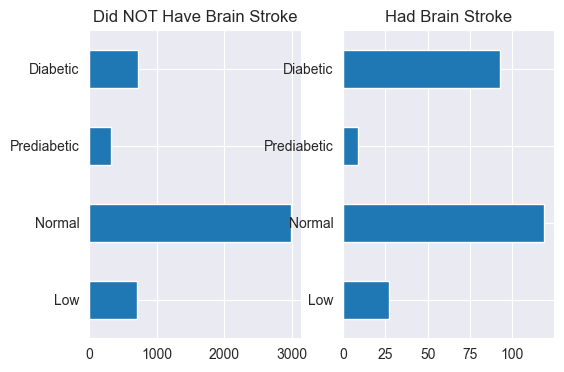

In [32]:
glucose = df[['stroke', 'avg_glucose_level']]
glucose['Category'] = pd.cut(x=glucose['avg_glucose_level'], bins = [50, 70, 117, 137, 300], labels= ['Low','Normal','Prediabetic','Diabetic'])

glucose_no_bs = glucose[glucose['stroke'] == 0]
glucose_bs = glucose[glucose['stroke'] == 1]

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
glucose_no_bs['Category'].value_counts().sort_index().plot(kind='barh')
plt.title('Did NOT Have Brain Stroke')

plt.subplot(1,2,2)
glucose_bs['Category'].value_counts().sort_index().plot(kind='barh')
plt.title('Had Brain Stroke')


# sns.barplot(x='Range', y='avg_glucose_level', hue='stroke', data=glucose, palette='bone')

A much larger proportion of patients who had a **brain stroke** also **had diabetes** (or, higher average glucose levels)

### BMI

Text(0.5, 1.0, 'BMI Distribution')

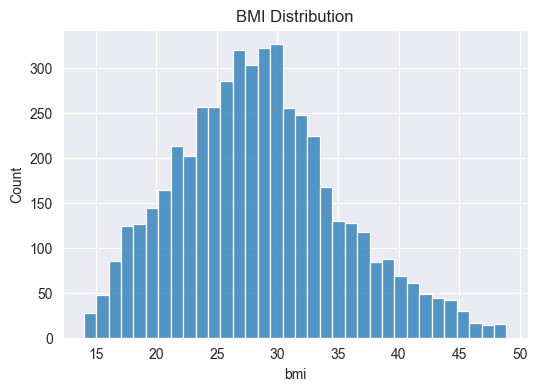

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')

Shape of BMI distribution if somewhat normal, centering between 25-30. However, this will be more insightful if we **categorize** bmi, similar to glucose levels

Here is the US standard BMI ranges:

- Under 18.5: Underweight
- 18.5-24.9: Healthy
- 25-29.9: Overweight
- Over 30: Obese

C:\Users\leena\AppData\Local\Temp\ipykernel_6340\2771183052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi['BMI Category'] = pd.cut(x=bmi['bmi'], bins=[0,18.5,24.9,29.9,50], labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])


Text(0.5, 1.0, 'Had Brain Stroke')

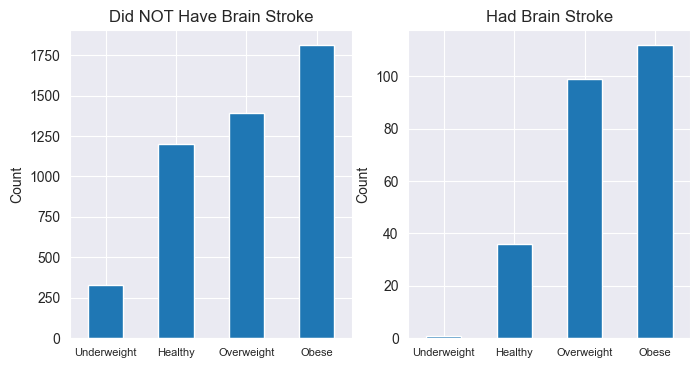

In [34]:
bmi = df[['stroke', 'bmi']]
bmi['BMI Category'] = pd.cut(x=bmi['bmi'], bins=[0,18.5,24.9,29.9,50], labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

bmi_no_bs = bmi[bmi['stroke'] == 0]
bmi_bs = bmi[bmi['stroke'] == 1]

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
bmi_no_bs['BMI Category'].value_counts().sort_index().plot(kind='bar')
plt.xticks(fontsize=8, rotation = 'horizontal')
plt.ylabel('Count')
plt.title('Did NOT Have Brain Stroke')

plt.subplot(1,2,2)
bmi_bs['BMI Category'].value_counts().sort_index().plot(kind='bar')
plt.xticks(fontsize=8, rotation = 'horizontal')
plt.ylabel('Count')
plt.title('Had Brain Stroke')


It appears that **majority of brain stroke patients** are **overweight/obese**, and there are proportionally significantly less healthy weight patients compared to patients who did not have a brain stroke. But it is worth to compute out how much exactly:

In [35]:
no_bs_healthy = round((bmi_no_bs['BMI Category'].value_counts().loc['Healthy']/bmi_no_bs.shape[0])*100, 2)
bs_healthy = round((bmi_bs['BMI Category'].value_counts().loc['Healthy']/bmi_bs.shape[0])*100,2)

print('% Non Brain Stroke Patients with Healthy BMI: ' + str(no_bs_healthy))
print('% Brain Stroke Patients with Healthy BMI: ' + str(bs_healthy))

% Non Brain Stroke Patients with Healthy BMI: 25.31
% Brain Stroke Patients with Healthy BMI: 14.52


In [36]:
bs_over = round((bmi_bs['BMI Category'].value_counts().loc['Overweight']/bmi_bs.shape[0])*100,2)
bs_obese = round((bmi_bs['BMI Category'].value_counts().loc['Obese']/bmi_bs.shape[0])*100,2)

bs_unhealthy = bs_over + bs_obese
bs_unhealthy

85.08

We can conclude that majority of **Brain Stroke patients are overwight or obese**. As a matter of fact, **85%** of patients who had a brain stroke were overweight or obese

### Smoking Status

Text(0.5, 1.0, 'Had Brain Stroke')

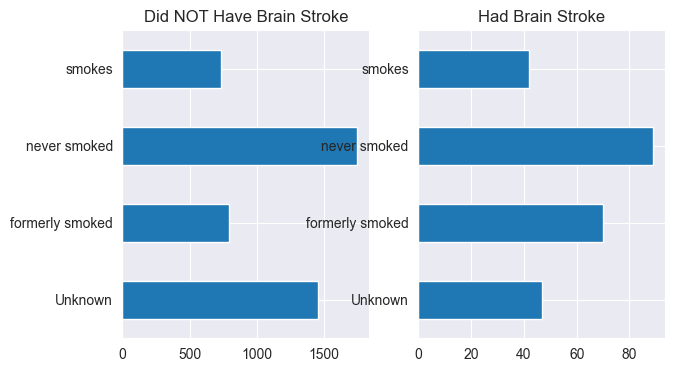

In [37]:
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
no_bs['smoking_status'].value_counts().sort_index().plot(kind='barh')
plt.title('Did NOT Have Brain Stroke')

plt.subplot(1,2,2)
bs['smoking_status'].value_counts().sort_index().plot(kind='barh')
plt.title('Had Brain Stroke')

Distribution of smoking status is very similar between brain stroke patients and non brain stroke patients.

## Correlation

Lets see if there is any noticable correlation between any of the **quantitative dependent variables**, again separating by patients who did and did not have a stroke (*age, hypertension, heart disease, glucose, bmi*) 

#### On Age, Hypertension, Heart Diesease, Glucose, Bmi

In [46]:
corr_no_bs = no_bs[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
corr_bs = bs[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]

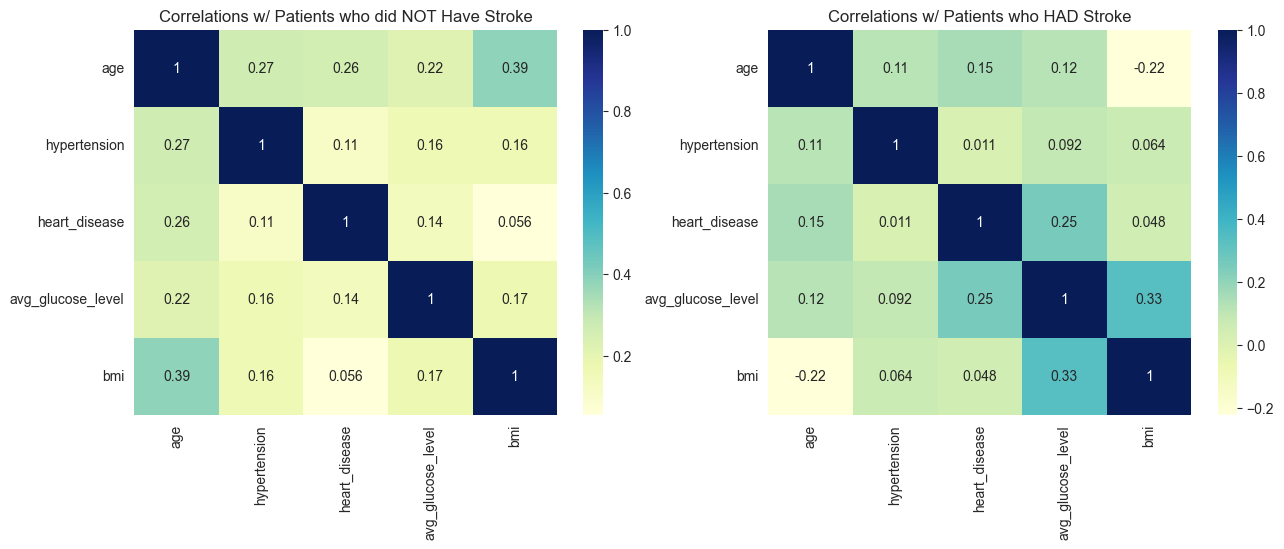

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(corr_no_bs.corr(),cmap='YlGnBu', annot=True)
plt.title('Correlations w/ Patients who did NOT Have Stroke')

plt.subplot(1,2,2)
sns.heatmap(corr_bs.corr(),cmap='YlGnBu', annot=True)
plt.title('Correlations w/ Patients who HAD Stroke')

plt.show()

**Observations:**
- Major difference is the correlation between **_age_** and **_bmi_**: non stroke patients is positively correlated whereas stroke patients are negatively correlated 

- **_Slightly more positive_** correlation amongst stroke patients involving **_glucose level and bmi_** compared to the non stroke patients

_based on these observations, I decided to create visualizations for bmi, glucose levels, and age to better understand their relationship_

### BMI and Age 

Text(0, 0.5, 'Age')

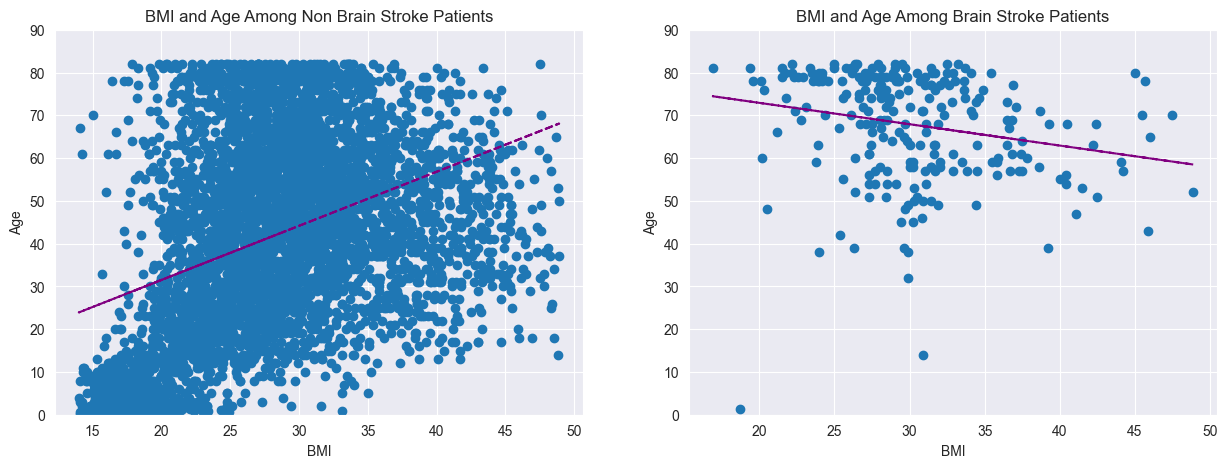

In [77]:
plt.figure(figsize=(15,5))

a,b = np.polyfit(no_bs.bmi, no_bs.age, 1)
c,d = np.polyfit(bs.bmi, bs.age, 1)

plt.subplot(1,2,1)
plt.scatter(no_bs.bmi, no_bs.age)
plt.plot(no_bs.bmi, a*(no_bs.bmi)+b, color='purple', linestyle='--')
plt.title('BMI and Age Among Non Brain Stroke Patients')
plt.xlabel('BMI')
plt.ylim(0,90)
plt.ylabel('Age')

plt.subplot(1,2,2)
plt.scatter(bs.bmi, bs.age)
plt.plot(bs.bmi, c*(bs.bmi)+d, color='purple', linestyle='--')
plt.title('BMI and Age Among Brain Stroke Patients')
plt.xlabel('BMI')
plt.ylim(0,90)
plt.ylabel('Age')

**Observations and Takeaways:**
- For _Brain Stroke Patients_: Majority of patients are in the **overweight and obese spectrum AND seniors**, as expected. However, it appears that slowly as the patient's bmi increases, they are younger. It is also good to note the **two potential outliers** towards the lower portion of the plot. 

- Since there is a positive correlation between bmi and age for non brain stroke patients, this negative correlation among brain stroke patients is therefore worth observing

### BMI and Average Glucose Level Among Brain Stroke Patients

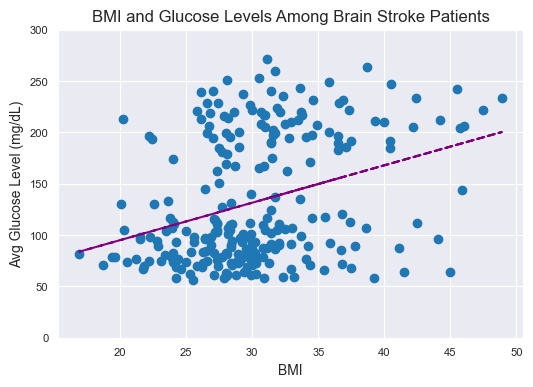

In [78]:
plt.figure(figsize=(6,4))

a,b = np.polyfit(bs.bmi, bs.avg_glucose_level, 1)

plt.scatter(bs.bmi, bs.avg_glucose_level)
plt.plot(bs.bmi, a*(bs.bmi)+b,color = 'purple', linestyle = '--')
plt.ylim(0,300)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.title('BMI and Glucose Levels Among Brain Stroke Patients')
plt.xlabel('BMI', fontsize=10)
plt.ylabel('Avg Glucose Level (mg/dL)', fontsize=10)


plt.show()

In [71]:
bs_glu_bmi_corr = bs['bmi'].corr(bs['avg_glucose_level'])
bs_glu_bmi_corr = round(bs_glu_bmi_corr, 2)
print(f'Correlation between BMI and Glucose Level With Patients w/ Brain Stroke: {bs_glu_bmi_corr}')

Correlation between BMI and Glucose Level With Patients w/ Brain Stroke: 0.33


### Age and Glucose Level Among Brain Stroke Patients

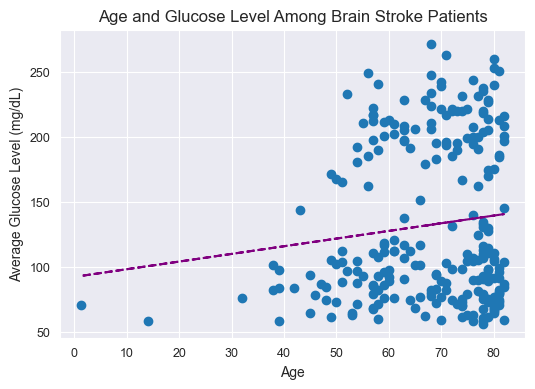

In [125]:
plt.figure(figsize=(6,4))

a,b = np.polyfit(bs.age, bs.avg_glucose_level, 1)

plt.scatter(bs.age, bs.avg_glucose_level)
plt.plot(bs.age, a*(bs.age)+b, linestyle = '--', color = 'purple')
plt.title('Age and Glucose Level Among Brain Stroke Patients')
plt.xlabel('Age')
plt.xticks(fontsize=9)
plt.ylabel('Average Glucose Level (mg/dL)')
plt.yticks(fontsize=9)

plt.show()

**Observations and Key Takeaways:** 
This scatterplot is **clustered around ages from 50 and above**. The line of best fit is mainly influenced by the two potential outliers on the bottom left, points that are around (3,75) and (14,60). Therefore, this plot **doesn't strongly suggest** that there is a positive correlation between age and glucose level. Instead, it appears that most brain stroke patients are older and have a wide variety of glucose levels